# **Build Regression (Linear,Ridge,Lasso) Models in NumPy Python**

## **Project Overview**



The English Premier League is one of the world's most-watched soccer leagues, with an estimated audience of 12 million people per game.
With the substantial financial benefits, all significant teams of EPL are interested in Analytics and AI. Regarding sports analytics, machine learning and artificial intelligence (AI) have become extremely popular. The sports entertainment sector and the relevant stakeholders extensively use sophisticated algorithms to improve earnings and reduce business risk associated with selecting or betting on the wrong players.


<br>

![image](https://cdn.pixabay.com/photo/2016/04/15/20/28/football-1331838__340.jpg)

<br>


Regression is one of the foundational techniques in Machine Learning. As one of the most well-understood algorithms, linear regression plays a vital role in solving real-life problems.

This project explains how linear regression works and how to build various regression models such as linear regression, ridge regression, lasso regression, and decision tree from scratch using the NumPy module.

## **Important Libraries**

* **pandas**: pandas is a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool built on top of the Python programming language. Refer to [documentation](https://pandas.pydata.org/) for more information.

* **NumPy**: The fundamental package for scientific computing with Python. Fast and versatile, the NumPy vectorization, indexing, and broadcasting concepts are the de-facto standards of array computing today. NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more. Refer to [documentation](https://numpy.org/) for more information. pandas and NumPy are together used for most of the data analysis and manipulation in Python.

## **Install Packages**

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

## **Data Reading from Different Sources**

In [137]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
df = pd.read_csv('C:/Users/DELL/EPL_Soccer_MLR_LR.csv')


print("ACTUAL DF SHAPE : ", df.shape)


ACTUAL DF SHAPE :  (217, 13)


## **Data Dictionary**

* PlayerName : Player Name

* Club : Club of the player
  1. MUN:Manchester United F.C.
  2. CHE: Chelsea F.C.
  3. LIV: Liverpool F.C.

* DistanceCovered(InKms): Average Kms distance covered by the player in each game

* Goals: Average Goals per match

* MinutestoGoalRatio: Minutes

* ShotsPerGame: Average shots taken per game

* AgentCharges: Agent Fees in h

* BMI: Body-Mass index

* Cost: Cost of each player in hundread thousand dollars

* PreviousClubCost: Previous club cost in hundread thousand dollars

* Height: Height of player in cm

* Weight: Weight of player in kg

* Score: Average score per match


In [139]:
# checking the first 5 rows and columns

df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60.0,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68.0,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21.0,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69.0,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29.0,18.96,80.3,53.20,184.6,64.6,17.64


In [140]:
# checking the last 5 rows and columns

df.tail()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Preprocessing**

### **Handling Missing Values**

Handling missing values is an important step in data preprocessing. Missing data can lead to biased results or affect the performance of machine learning models. There are several ways to handle missing values such as:

* Dropping missing values: This approach involves dropping the rows or columns that contain missing values. However, this method may lead to loss of information, especially if a large number of rows or columns have missing values.

* Imputing missing values: This approach involves filling in the missing values with a value that is either derived from other observations or estimated using statistical methods. Common imputation methods include mean imputation, median imputation, and regression imputation.

* Using advanced methods: There are more advanced methods for handling missing data such as multiple imputation, k-nearest neighbors imputation, and matrix completion. These methods can be more accurate than simple imputation methods, but they may also be more computationally intensive.

In general, the choice of how to handle missing values will depend on the specific problem and dataset. It is important to carefully consider the impact of missing values on the analysis and choose an appropriate method that balances the need for accurate results with the computational complexity of the method.





In [147]:
# ( Nah)

df.dropna(axis=0, how='all', subset=None, inplace=True)


In [149]:
# checking the first 5 rows and columns

df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60.0,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68.0,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21.0,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69.0,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29.0,18.96,80.3,53.20,184.6,64.6,17.64


In [151]:
# checking the last 5 rows and columns

df.tail()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
197,"Ryan, Mr. Patrick",LIV,4.90,7.6,45.6,16.0,90.0,27.56,67.2,82.0,183.9,93.2,11.79
198,"Saad, Mr. Amin",LIV,5.66,8.3,50.2,17.7,38.0,23.76,56.5,72.0,183.5,80.0,10.05
199,"Saad, Mr. Khalil",LIV,5.03,6.4,42.7,14.3,122.0,22.01,47.6,68.0,183.1,73.8,8.51
200,"Saade, Mr. Jean Nassr",LIV,4.97,8.8,43.0,14.9,233.0,22.34,60.4,63.0,178.4,71.1,11.50
201,"Sadlier, Mr. Matthew",LIV,5.38,6.3,46.0,15.7,32.0,21.07,34.9,72.0,190.8,76.7,6.26


In [153]:
print(df.shape)

(202, 13)


In [155]:


new_df = df.select_dtypes(['number'])
new_df


,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,3.96,7.5,37.5,12.3,60.0,20.56,109.1,63.32,195.9,78.9,19.75
1,4.41,8.3,38.2,12.7,68.0,20.67,102.8,58.55,189.7,74.4,21.30
2,4.14,5.0,36.4,11.6,21.0,21.86,104.6,55.36,177.8,69.1,19.88
3,4.11,5.3,37.3,12.6,69.0,21.88,126.4,57.18,185.0,74.9,23.66
4,4.45,6.8,41.5,14.0,29.0,18.96,80.3,53.20,184.6,64.6,17.64
...,...,...,...,...,...,...,...,...,...,...,...
197,4.90,7.6,45.6,16.0,90.0,27.56,67.2,82.00,183.9,93.2,11.79
198,5.66,8.3,50.2,17.7,38.0,23.76,56.5,72.00,183.5,80.0,10.05
199,5.03,6.4,42.7,14.3,122.0,22.01,47.6,68.00,183.1,73.8,8.51
200,4.97,8.8,43.0,14.9,233.0,22.34,60.4,63.00,178.4,71.1,11.50


In [157]:
# Hình dạng dữ liệu sau khi lọc

print(new_df.shape)


(202, 11)


### **Finding Correlated Features**

In the context of regression models, finding and removing correlated features is an essential step in preprocessing the data. Correlation is a statistical measure that describes how strongly two variables are related to each other. In the case of features, if two features have a high correlation with each other, it means that they provide similar information to the model, which can cause issues such as overfitting, multicollinearity, and reduced interpretability.

To find correlated features, we typically calculate a correlation matrix between all pairs of features. We can use tools such as NumPy's corrcoef function or Pandas' corr method to compute the correlation matrix. Once we have the correlation matrix, we can identify highly correlated feature pairs by looking at the absolute values of the correlation coefficients.

To know more about Multicollinearity and its affects, please go through the [Linear Regression Model Project in Python for Beginners Part 2 Notebook](https://s3.amazonaws.com/projex.dezyre.com/multiple-linear-regression-project-for-beginners/materials/regression_part2_.ipynb).

In [160]:
#Tạo biến độc lập và biến phụ thuộc

X = new_df.iloc[:,:-1] 
y = new_df.iloc[:,-1] 

print("org shape of X : ", X.shape)


correlated_features = set()
correlation_matrix = X.corr()



org shape of X :  (202, 10)


In [162]:

# Xuất ma trận tương quan

correlation_matrix

#-----------------#

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000


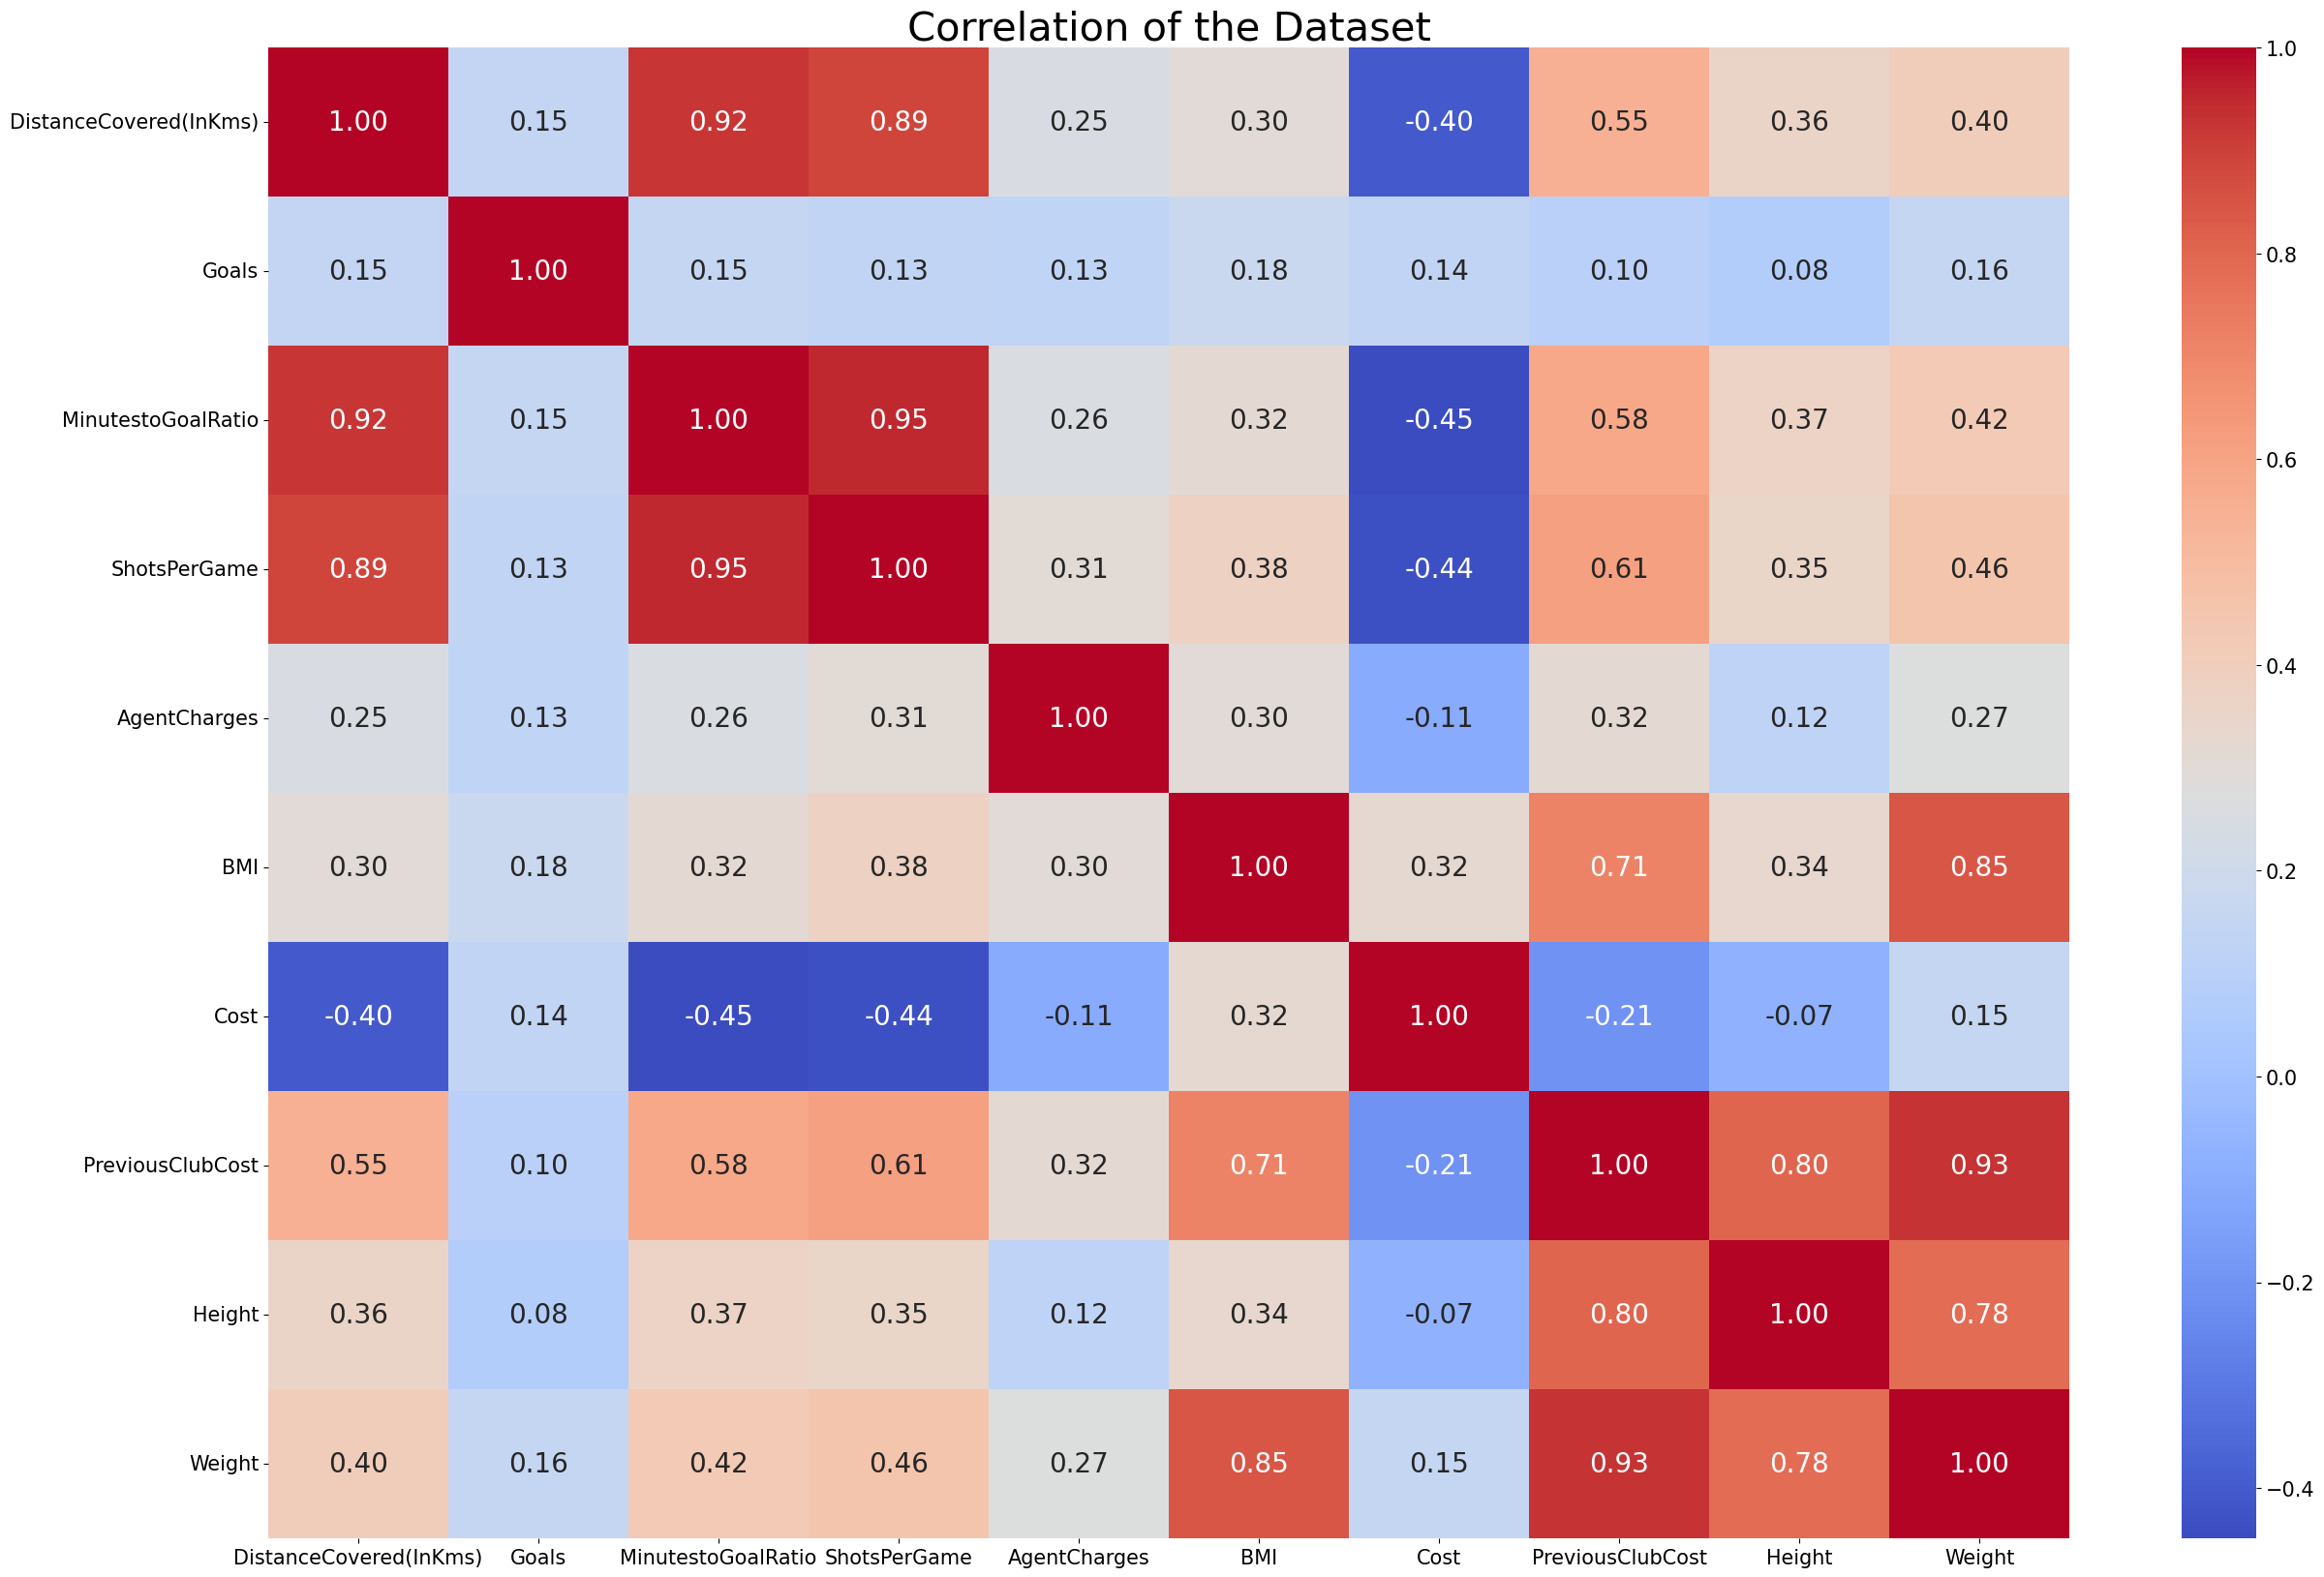

In [164]:
# Vẽ heatmap cho ma trận tương quan
plt.rcParams['figure.figsize'] = (30, 20)
plt.rcParams['xtick.labelsize'] = 15  # Kích thước chữ cho nhãn trục x
plt.rcParams['ytick.labelsize'] = 15  # Kích thước chữ cho nhãn trục y
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={"size": 20})

plt.title('Correlation of the Dataset', fontsize=30)
plt.show()

In [165]:


for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8: #Tìm các đặc trưng tương quan > 0.8
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("Correlated Features : ", correlated_features)


Correlated Features :  {'Height', 'MinutestoGoalRatio', 'Weight', 'ShotsPerGame'}


In [166]:


# Dropping Correlated features from X
X.drop(columns=correlated_features, axis=1, inplace=True)
print("Shape of X after dropping correlated features : ", X.shape)


Shape of X after dropping correlated features :  (202, 6)


In [170]:
X

,DistanceCovered(InKms),Goals,AgentCharges,BMI,Cost,PreviousClubCost
0,3.96,7.5,60.0,20.56,109.1,63.32
1,4.41,8.3,68.0,20.67,102.8,58.55
2,4.14,5.0,21.0,21.86,104.6,55.36
3,4.11,5.3,69.0,21.88,126.4,57.18
4,4.45,6.8,29.0,18.96,80.3,53.20
...,...,...,...,...,...,...
197,4.90,7.6,90.0,27.56,67.2,82.00
198,5.66,8.3,38.0,23.76,56.5,72.00
199,5.03,6.4,122.0,22.01,47.6,68.00
200,4.97,8.8,233.0,22.34,60.4,63.00


## **Train - Test Split**

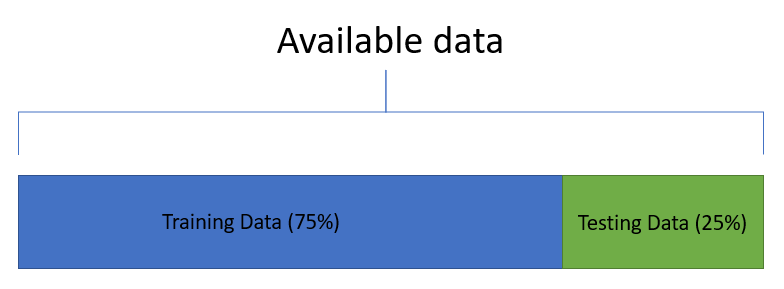


The data points are divided into two datasets, train and test, in a train test split method. The train data is used to train the model, and the model is then used to predict on the test data to see how the model performs on unseen data and whether it is overfitting or underfitting.

In this project we are taking 80:20 ratio of train and test data.

<br>



In [173]:
# Tạo dữ liệu Huấn luyện và Kiểm tra

def shuffle_data(X, y, seed=None):
    """
    Xáo trộn ngẫu nhiên các mẫu trong X và y.
    """
    # Đặt hạt giống cho bộ sinh số ngẫu nhiên nếu được cung cấp
    if seed:
        np.random.seed(seed)

    # Tạo một mảng các chỉ số tương ứng với các mẫu trong X và y
    idx = np.arange(X.shape[0])

    # Xáo trộn ngẫu nhiên các chỉ số
    np.random.shuffle(idx)

    # Trả về các đặc trưng đầu vào và biến mục tiêu đã được xáo trộn
    try:
        return X[idx], y[idx]
    except:
        return X.iloc[idx], y.iloc[idx]

#### **Shuffle Data: Code Explanation**

The `shuffle_data()` function takes three parameters: `X`,` y`, and `seed`. `X` and `y` are the input features and target variable, respectively, which can be either an `ndarray` or a` DataFrame`. The `seed` parameter is an optional integer that can be used to set the seed for the random number generator.

The function first checks if a seed has been provided, and if so, sets the seed for the random number generator. Then, it creates an array of indices that correspond to the samples in `X` and `y` using the `arange()` function from NumPy. Next, it uses the `shuffle()` function from NumPy to randomly shuffle the indices.

Finally, the function returns the shuffled input features and target variable. If `X` and `y` are DataFrame objects, the function uses the `iloc[]` indexer to retrieve the shuffled data.


In [176]:
def train_test_split(X, y, test_size=0.5, shuffle=True, seed=None):
    
    # Chia dữ liệu thành tập huấn luyện và kiếm tra
    """
    Splits the data into training and test sets. 
    """

    if shuffle:
        # shuffle the data
        X, y = shuffle_data(X, y, seed)

    # Chia dữ liệu đào tạo từ dữ liệu thử nghiệm theo tỷ lệ được chỉ định trong test_size
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test


In [178]:

# hàm train_test_split() để tạo một tập kiểm tra gồm 20% dữ liệu với seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, seed=42)


In [180]:
# In y_test dưới dạng mảng NumPy
print("Giá trị thực tế (y_test):")
print(y_test.values)  # Hoặc print(y_test.to_numpy())


Giá trị thực tế (y_test):
[10.64  6.    9.89 13.61 26.65  8.54 26.5  10.05  6.92 14.52 26.78 10.74
 16.38 19.61  7.72 11.63  7.16 19.39  6.76  8.64 21.3  30.1   6.56  8.77
  6.33  8.56 13.46  6.96 10.15 23.01  8.61  6.26 16.25  8.87 24.88  9.17
 18.77 15.31  9.86  6.16]


## **Multiple Linear Regression**


Linear regression, often known as simple regression, creates a relationship between two variables. Linear regression is represented visually as a straight line, with the slope determining how a change in one variable affects a change in the other. A linear regression relationship's y-intercept reflects one variable's value when the other's value is 0.

Multiple linear regression estimates the relationship between two or more independent variables and one dependent variable.
$$\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$$

where $p$ is... number of features in the model.

* For any given independent variable (x) value, y is the dependent variable's predicted value for the dependent variable (y).
* $\beta_0$ represents the intercept, or the predicted value of y, when x is 0.
* $\beta_1$ is the regression coefficient of variable $x_1$, which tells us how much y will change as $x_1$ increases or decreases.
* $\beta_p$is the regression coefficient of the last variable $x_p$, which tells us how much y will change as $x_p$ increases or decreases.
* $x_1$ ... $x_p$ are the independent or predictor variables that help us predict y
* $\epsilon$ is the error left due to the incorrect calculation of the regression coefficients.


To understand the basics of Linear Regression, cost function and least squares, refer to the [Linear Regression Model Project in Python for Beginners Part 1 Notebook](https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/regression_part_1.ipynb) where Simple Linear Regression and the mathematics behind it have been explained in detail.




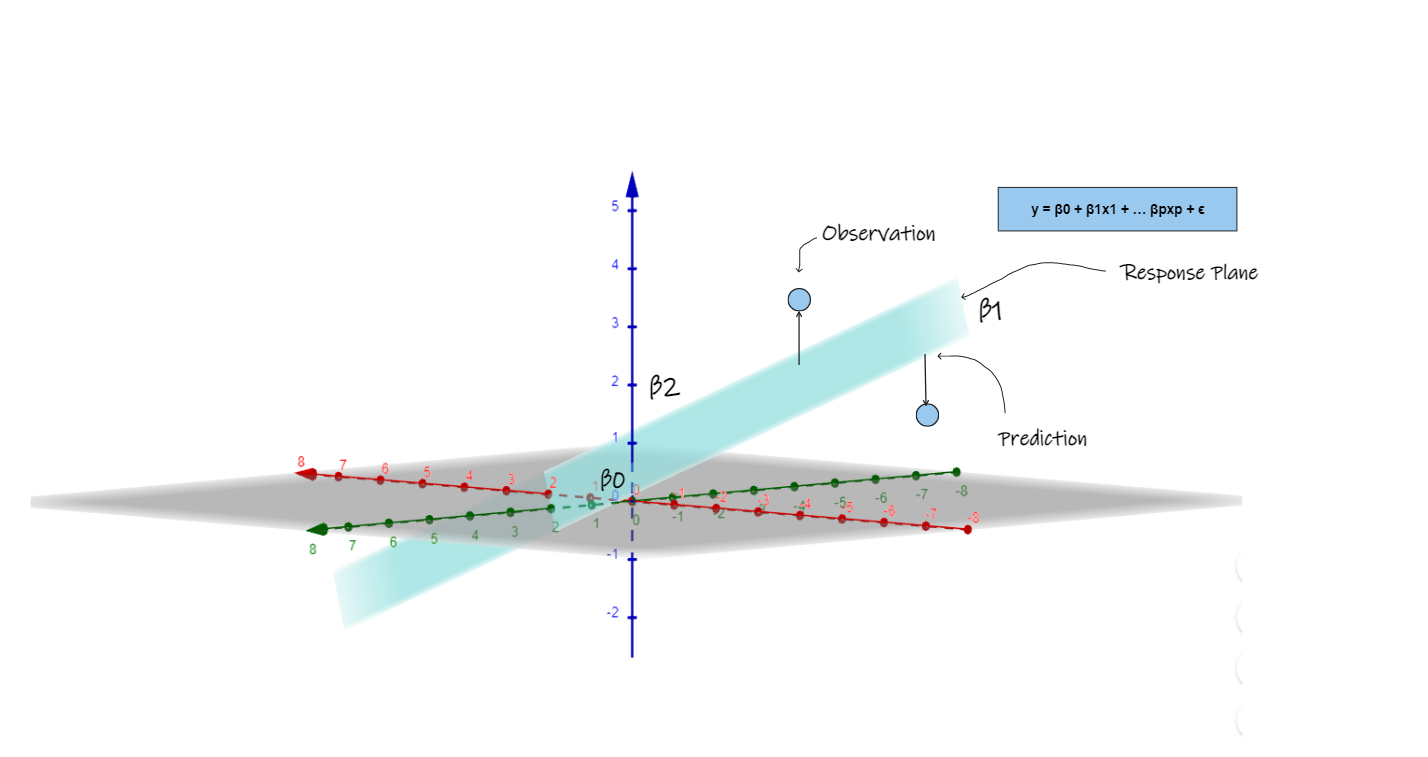

Watch the video [Understanding Ridge and Lasso regression](https://www.projectpro.io/project/hackerday-project/project-title/build%20numpy%20regression%20models#sub-hackerday-video-3) for understanding.

## **Model Building with Numpy**

### **Linear Regression: Code Explanation**

The code is an implementation of linear regression using gradient descent as the optimization algorithm.

The class `LinearRegression` has two hyperparameters - `lr` and `n_iter`. `lr` stands for the learning rate, which determines the step size in the gradient descent algorithm. `n_iter` stands for the number of iterations that the algorithm will run. `self.weights` and `self.bias` have been initialized as None.

The `fit()` method is used to train the model on a given set of input features X and output variable y. The first step in the `fit()` method is to initialize the model parameters `self.weights` and `self.bias`. The weights are initialized as an array of zeros and the bias is initialized to 0.

The loop in the `fit()` method runs for `n_iter` iterations. In each iteration, the model makes a prediction `y_pred` for the given input `X`. Then, the gradients `dW` and `db` are computed using the prediction and the true values `y`. The gradients represent the direction of steepest ascent in the cost function. The weights and bias are then updated using the computed gradients and the learning rate `lr`.

The term `np.dot(X, self.weights)` represents the linear combination of the features in the input data `X` weighted by the coefficients `self.weights`. This dot product gives the predicted output value for each input sample. The term `self.bias` is added to the result of the dot product to give the final predicted output value.

In other words, the dot product of the input data and the model's learned coefficients gives a weighted sum of the input features, and the bias term is added to this to shift the prediction up or down by a constant amount. The resulting value is the predicted output for the given input sample.

The `predict()` method is used to make predictions on new data using the trained model. It takes input features `X` and returns the predicted output `y_pred`.


In [187]:


class LinearRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        # hyperparameters initialization
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # parameter initialization
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            # prediction
            y_pred = self.predict(X)

            # y = Wx+b

            # compute gradients
            dW = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.sum(y_pred - y) / n_samples

            # update parameters
            self.weights -= self.lr * dW
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


### **Ridge Regression: Code Explanation**

The code is similar to the Linear Regression code, but the only difference is the addition of the Ridge regularization term in the gradient calculation.

In the Ridge Regression, the cost function is defined as:

`cost = MSE + alpha * sum(W^2)`

where MSE is the mean squared error, W is the weight of the linear regression, and alpha is the regularization strength parameter.

The gradient of the cost function w.r.t W is calculated as:

`dW = (-(2np.dot(X.T,(y-y_pred))) + (2self.alpha*self.weights)) / n_samples`

where X is the input data, y is the true labels, y_pred is the predicted labels, and n_samples is the number of samples in the data. The gradient of the cost function w.r.t bias is calculated as:

`db = -2*np.sum(y_pred - y) / n_samples`



In [190]:
class RidgeRegression:
    def __init__(self, alpha =1, lr=0.01, n_iter=1000):
        # hyperparameters initialization
        self.alpha = alpha
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # parameter initialization
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            # prediction
            y_pred = self.predict(X)

            #cost = MSE + alpha*W**2

            # compute gradients
            dW = (-(2*np.dot(X.T,(y-y_pred)))+(2*self.alpha*self.weights)) / n_samples
            db = -2*np.sum(y_pred - y) / n_samples

            # update parameters
            self.weights -= self.lr * dW
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

### **Lasso Regression: Code Explanation**

The code is an implementation of Lasso Regression, a linear regression algorithm with L1 regularization. The key differences from Ridge Regression include the cost function and the calculation of the weight gradients.

In Lasso Regression, the cost function includes an L1 regularization term (i.e., the absolute value of the weights) as opposed to an L2 regularization term (i.e., the square of the weights) in Ridge Regression. The cost function can be expressed as:

`cost = MSE + alpha * sum(|W|)`
Where MSE is the Mean Squared Error, alpha is the regularization strength, and W is the vector of weights.

The weight gradients are calculated as:
`dW = (-(2*np.dot(X.T,(y-y_pred))) + (self.alpha)) / n_samples`

Here, the absolute value of the weight is included in the regularization term by adding a constant `(self.alpha)` to the gradients. This ensures that some of the weights are forced to zero during training, effectively performing feature selection.

The bias term is updated as in the Ridge Regression algorithm.

In [193]:
class LassoRegression:
    def __init__(self, alpha =1, lr=0.01, n_iter=1000):
        # hyperparameters initialization
        self.alpha = alpha
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # parameter initialization
        self.weights = np.zeros(n_features)
        self.bias = 0

        # cost = MSE + alpha*|W|

        for _ in range(self.n_iter):
            # prediction
            y_pred = self.predict(X)

            # compute gradients
            dW = (-(2*np.dot(X.T,(y-y_pred)))+(self.alpha)) / n_samples
            db = -2*np.sum(y_pred - y) / n_samples

            # update parameters
            self.weights -= self.lr * dW
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## **Model Implementation**

#### **Linear Model**

In [197]:

print("Giá trị thực tế (y_test):")
print(y_test.values)  


Giá trị thực tế (y_test):
[10.64  6.    9.89 13.61 26.65  8.54 26.5  10.05  6.92 14.52 26.78 10.74
 16.38 19.61  7.72 11.63  7.16 19.39  6.76  8.64 21.3  30.1   6.56  8.77
  6.33  8.56 13.46  6.96 10.15 23.01  8.61  6.26 16.25  8.87 24.88  9.17
 18.77 15.31  9.86  6.16]


In [199]:

linear_model = LinearRegression(lr=.00001, n_iter=100)
linear_model.fit(X_train, y_train)
linear_predict = linear_model.predict(X_test)


In [201]:
linear_predict
#Score


array([13.52651862,  8.826137  , 11.76082141, 11.38120362, 24.87800019,
       11.510069  , 26.38325501, 12.04485167,  8.48976753, 13.45347018,
       25.43338534,  9.6334166 , 14.45580138, 18.50265399,  9.17589445,
       13.95364798,  9.54601633, 16.22816313,  8.0560115 , 12.93060113,
       18.40354559, 30.34837398,  8.45739681, 11.38342704,  7.64332294,
       11.36396265, 10.91255589,  9.08742177,  9.55959634, 23.61318086,
       10.29570465,  8.69116286, 15.23348766, 11.12476375, 23.95303139,
       11.33697437, 17.65551944, 12.54150308, 10.61551881,  8.57220104])

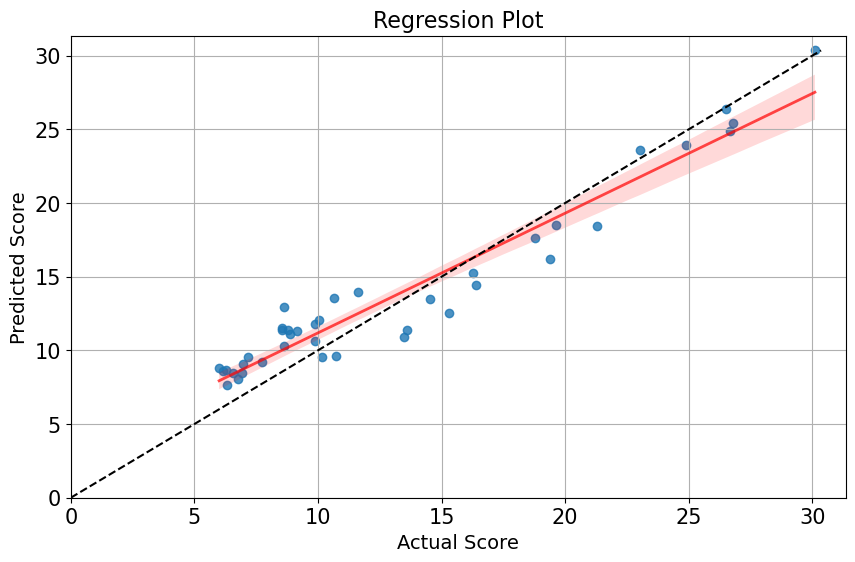

In [203]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=linear_predict, marker='o', line_kws={"color": "red", "alpha": 0.7, "lw": 2})

plt.title('Regression Plot', fontsize=16)
plt.xlabel('Actual Score', fontsize=14)
plt.ylabel('Predicted Score', fontsize=14)
plt.xlim(0, max(y_test.max(), linear_predict.max()) + 1)  # Giới hạn trục x
plt.ylim(0, max(y_test.max(), linear_predict.max()) + 1)  # Giới hạn trục y
plt.plot([0, max(y_test.max(), linear_predict.max())], [0, max(y_test.max(), linear_predict.max())], 'k--')  # Đường y=x

plt.grid()
plt.show()

#### **Lasso Model**

In [206]:
# Khởi tạo mô hình Lasso Regression
lasso_model = LassoRegression(alpha=0.03, lr=0.00001, n_iter=100)

# Huấn luyện mô hình với dữ liệu huấn luyện
lasso_model.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
lasso_predict = lasso_model.predict(X_test)


In [208]:
lasso_predict


array([13.06088756,  8.44585376, 10.72710759, 11.59714215, 27.0385081 ,
       10.75949089, 28.31434227, 12.01082131,  7.60245389, 13.65633251,
       27.93205764,  9.60753929, 14.98944187, 19.76684604,  8.60165902,
       12.62387962,  8.62436272, 17.41121762,  6.97003426, 12.77703464,
       19.45652898, 33.24745667,  7.61147206, 10.44403588,  6.92560558,
       10.74570598, 11.22042103,  7.54850715,  9.61454703, 24.96806512,
        8.57737179,  8.17836783, 15.88618658, 10.17587436, 26.03147031,
       10.26408564, 18.90303473, 11.87092157,  9.95972606,  7.80027618])

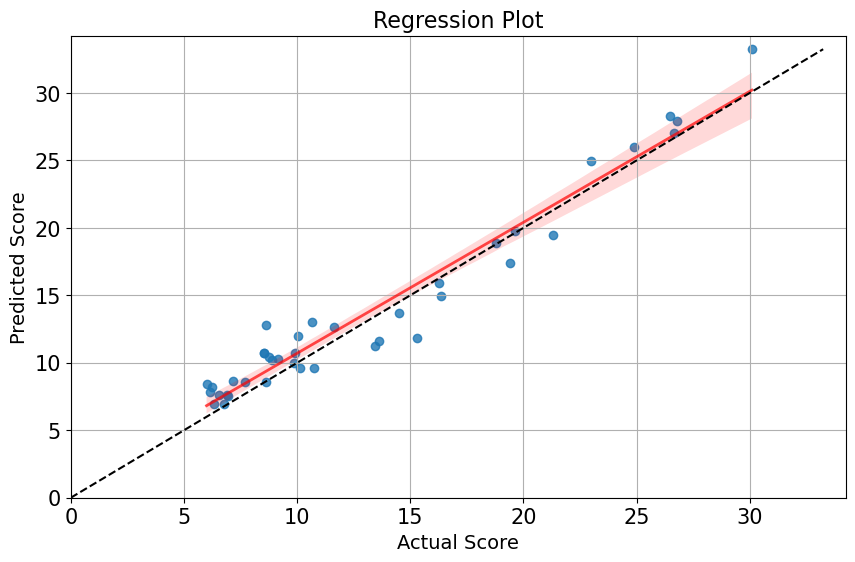

In [210]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=lasso_predict, marker='o', line_kws={"color": "red", "alpha": 0.7, "lw": 2})

plt.title('Regression Plot', fontsize=16)
plt.xlabel('Actual Score', fontsize=14)
plt.ylabel('Predicted Score', fontsize=14)
plt.xlim(0, max(y_test.max(), lasso_predict.max()) + 1)  # Giới hạn trục x
plt.ylim(0, max(y_test.max(), lasso_predict.max()) + 1)  # Giới hạn trục y
plt.plot([0, max(y_test.max(), lasso_predict.max())], [0, max(y_test.max(), lasso_predict.max())], 'k--')  # Đường y=x

plt.grid()
plt.show()

#### **Ridge Model**

In [213]:
# Khởi tạo mô hình Ridge Regression
ridge_model = RidgeRegression(alpha=0.03, lr=0.00001, n_iter=100)

# Huấn luyện mô hình với dữ liệu huấn luyện
ridge_model.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
ridge_predict = ridge_model.predict(X_test)


In [215]:
ridge_predict


array([13.06088975,  8.44585627, 10.72710945, 11.59714409, 27.0385078 ,
       10.75949306, 28.31434128, 12.01082397,  7.60245542, 13.65633349,
       27.93205767,  9.60754169, 14.98944297, 19.76684692,  8.60166179,
       12.62387977,  8.62436427, 17.4112189 ,  6.97003663, 12.77703663,
       19.45652941, 33.24745536,  7.61147406, 10.44403742,  6.92560793,
       10.74570753, 11.22042257,  7.54850898,  9.61454963, 24.96806561,
        8.57737322,  8.17837051, 15.88618781, 10.1758769 , 26.03147104,
       10.26408664, 18.90303562, 11.87092153,  9.95972825,  7.80027865])

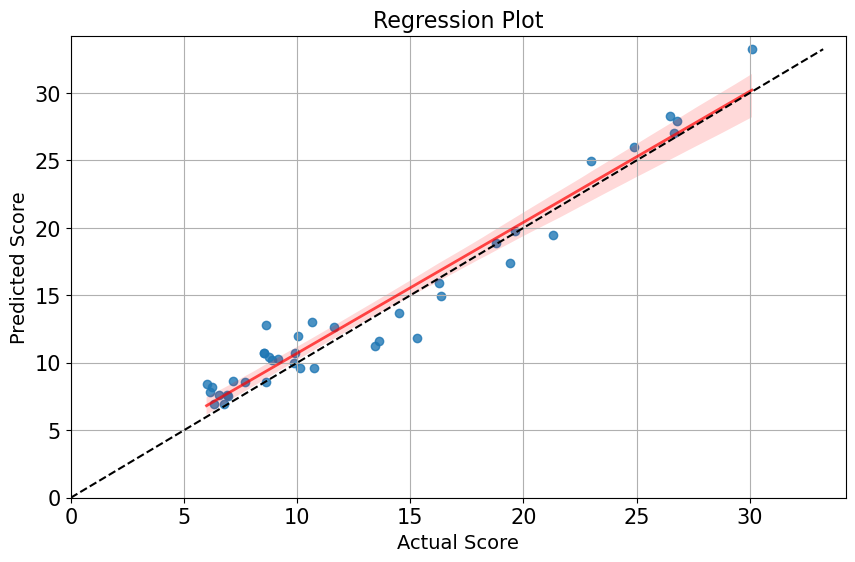

In [217]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=ridge_predict, marker='o', line_kws={"color": "red", "alpha": 0.7, "lw": 2})

plt.title('Regression Plot', fontsize=16)
plt.xlabel('Actual Score', fontsize=14)
plt.ylabel('Predicted Score', fontsize=14)
plt.xlim(0, max(y_test.max(), ridge_predict.max()) + 1)  # Giới hạn trục x
plt.ylim(0, max(y_test.max(), ridge_predict.max()) + 1)  # Giới hạn trục y
plt.plot([0, max(y_test.max(), ridge_predict.max())], [0, max(y_test.max(), ridge_predict.max())], 'k--')  # Đường y=x

plt.grid()
plt.show()

## **Model Evaluation**

#### **MSE**

In [221]:
def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

#### **R2 Score**

In [224]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    print(corr_matrix)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [226]:
print("MSE of Linear Model : ", mean_squared_error(y_test, linear_predict))
print("MSE of Lasso Model : ", mean_squared_error(y_test, lasso_predict))
print("MSE of Ridge Model : ", mean_squared_error(y_test, ridge_predict))

MSE of Linear Model :  4.288101722760345
MSE of Lasso Model :  2.849692797681988
MSE of Ridge Model :  2.849694826129537


In [228]:
print("R2 Score of Linear Model : ", r2_score(y_test, linear_predict))
print("R2 Score of Lasso Model : ", r2_score(y_test, lasso_predict))
print("R2 Score of Ridge Model : ", r2_score(y_test, ridge_predict))

[[1.         0.96521229]
 [0.96521229 1.        ]]
R2 Score of Linear Model :  0.9316347693382256
[[1.         0.97366924]
 [0.97366924 1.        ]]
R2 Score of Lasso Model :  0.9480317900859903
[[1.         0.97366923]
 [0.97366923 1.        ]]
R2 Score of Ridge Model :  0.9480317788420329


## **Linear Regression in Real Life**

There are many real-world applications of linear regression. Exploring some of the best Linear Regression real-world applications will help us comprehend the concept more clearly.

1. Humans are not an exception; everything has a shelf life. We can store vast amounts of information about a person's medical history and estimate how long they will live thanks to ongoing improvements in medical science technology and diagnostic tools.
The term "life expectancy" describes the number of years one can expect to live. This application is frequently used by insurance companies and public healthcare organizations to increase their productivity and achieve organizational goals.

2. A common method used by agricultural scientists to assess how fertilizer and water affect crop yields is linear regression.
For instance, researchers may vary the water and fertilizer applications in various fields to observe the effects on crop yield. A multiple linear regression model can be used with crop yield as the target variable and fertilizer and water as the predictor variables.

3. For professional sports teams, analysts use linear regression to gauge the impact of various training schedules on player performance. For instance, data scientists in the NBA may examine how various frequencies of yoga and weightlifting sessions each week affect a player's point total. With yoga and weightlifting sessions as the predictor variables and total points earned as the response variable, they could fit a multiple linear regression model. Here's another project that solves the same business problem, [Learn to Build a Polynomial Regression Model from Scratch](https://www.projectpro.io/project-use-case/polynomial-regression-model-in-python-from-scratch).



<h1><center>Thank you for choosing ProjectPro!</center></h1>
